In [3]:
import gdal
from osgeo import ogr
import geopandas as gpd
from PIL import Image
import numpy as np

In [8]:
file = '../../../data/raw/train_tier_1/kam/4e7c7f-labels/4e7c7f.geojson'
gdf = gpd.read_file(file)

Projecting `gdf` into same coordinates as `tif` images:

In [9]:
gdf = gdf.to_crs(epsg=32636)

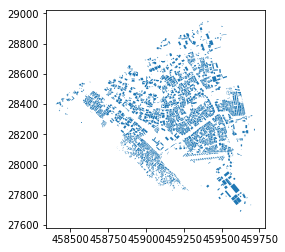

In [20]:
gdf.plot()

Reading `gdf` as a `ogr` object to transform it to raster:

In [11]:
data = ogr.Open(gdf.to_json())

In [12]:
layer = data.GetLayer()

Get max and min of our data:

In [13]:
xmin, xmax, ymin, ymax = layer.GetExtent()

In [14]:
layer.GetExtent()

(458403.24982660695, 459720.18225197995, 27647.464187390637, 28954.81319271352)

Now we define the total height and width of our 

In [15]:
grid_y = 40024 # rows
grid_x = 39270 # cols

In [16]:
pixel_size_y = (ymax - ymin) / grid_y
pixel_size_x = (xmax - xmin) / grid_x

In [17]:
pixel_size_y

0.03266412665707779

In [18]:
pixel_size_x

0.0335353304143876

## Checking properties of tif image of training features 

In [21]:
file2 = '../../../data/raw/train_tier_1/kam/4e7c7f/4e7c7f.tif'

In [24]:
data2 = gdal.Open(file2)

In [28]:
geo = data2.GetGeoTransform()

In [36]:
xmin = geo[0]
ymax = geo[3]
xmax = xmin + geo[1] * data2.RasterXSize
ymin = ymax + geo[5] * data2.RasterYSize

In [40]:
pixelXSize = geo[1]

In [41]:
pixelYSize = -geo[5]

In [37]:
print(xmin, xmax, ymin, ymax)

458403.24982660764 459790.84881343896 27553.040733510406 28967.28522244155


In [34]:
print(data2.RasterXSize)

39270


In [35]:
print(data2.RasterYSize)

40024


In [42]:
print(pixelXSize)

0.03533483541714589


In [43]:
print(pixelYSize)

0.035334911276512705


## Trying to rasterize

In [13]:
output_raster = '../../data/clean/train/kam/labels/kampala_labels.tif'

In [18]:
gdal.Rasterize(output_raster, file, xRes=pixel_size_x, yRes=pixel_size_y,
               outputBounds=[xmin, ymin, xmax, ymax], 
               outputType=gdal.GDT_Byte)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f0408ecfd20> >

## Checking the result

In [19]:
Image.MAX_IMAGE_PIXELS = 1713427900

In [20]:
im = Image.open(output_raster)

In [21]:
x = np.array(im)

In [22]:
x.shape

(40024, 39270)

In [23]:
np.amax(x)

228

In [24]:
np.amin(x)

0

In [25]:
np.unique(x)

array([  0,   1,   2,   3,   4,   6,   8,  12,  14,  16,  17,  21,  22,
        23,  28,  32,  38,  42,  46,  73,  83,  88, 102, 114, 130, 131,
       132, 135, 142, 153, 156, 166, 175, 176, 177, 206, 214, 227, 228],
      dtype=uint8)

In [26]:
display(Image.fromarray(x), Image.LANCZOS)

1

In [40]:
def segment_image(image, width):
    size_x, size_y = image.shape
    x = 0
    y = 0
    rv = []
    
    while x + width <= size_x:
        
        while y + width <= size_y:
            
            sub_image = image[x:x+width, y:y+width]
            rv.append(sub_image)
            y += width
    
        y = 0
        x += width
    
    return rv

In [41]:
images = segment_image(x, 512)

In [45]:
len(images)

5928

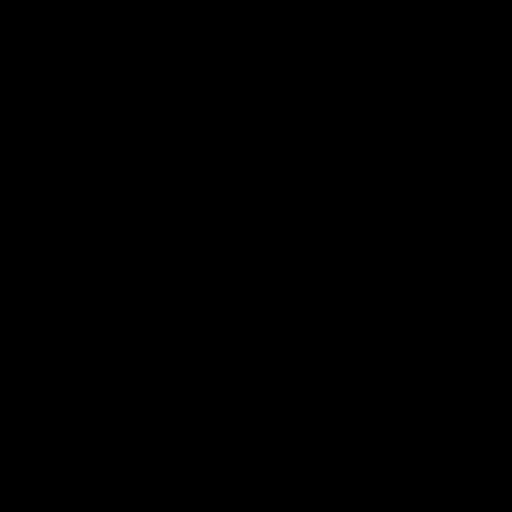

1

In [57]:
display(Image.fromarray(images[2569]), Image.LANCZOS)

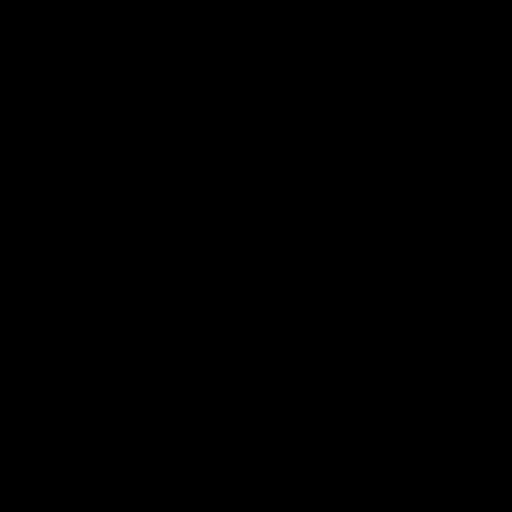

1

In [51]:
display(Image.fromarray(images[2003]), Image.LANCZOS)